In [1]:
import math
import matplotlib.pyplot as plt
from time import time
from random import randint

In [2]:
def run_and_plot(functions, generate_instance, start, end, step):
    for f in functions:
        timings = []
        for i in range(start, end, step):
            args = generate_instance(i)
            startt = time()
            f(*args)
            endt = time()
            timings.append(endt - startt)
        plt.plot(timings)

# Text Justification

In [3]:
W_example = ["jars", "jaws", "joke", "jury", "juxtaposition"]
L_example = 15

### Recursive solution

In [4]:
def tj_recursive(L, W):
    def P(i, j): # penalty
        length = sum([len(W[k]) for k in range(i, j)])
        length += j - i - 1 # adding spaces
        if length > L:
            return math.inf
        return (L - length)**3
    
    def TJP(i):
        if i == 0: 
            return 0
        return min([TJP(j) + P(j, i) for j in range(i)])
    
    return TJP(len(W))

In [5]:
tj_recursive(L_example, W_example)

440

### DP solution

In [6]:
def tj_dynamic_obf(L, W):
    def P(i, j):
        length = sum([len(W[k]) for k in range(i, j)])
        length += j - i - 1 # adding spaces
        if length > L:
            return math.inf
        return (L - length)**3
    
    def TJP(n):
        tbl = [ math.inf ] * (n + 1)
        tbl[0] = 0
        for i in range(1, n + 1):
            tbl[i] = min([tbl[j] + P(j, i) for j in range(i)])
        return tbl[n]

    return TJP(len(W))

In [7]:
tj_dynamic_obf(L_example, W_example)

440

Let us compare the performance of the recursive and dp solutions.

In [8]:
def gen_text(len_text, len_word):
    return ["A" * randint(1, len_word) for _ in range(len_text)]

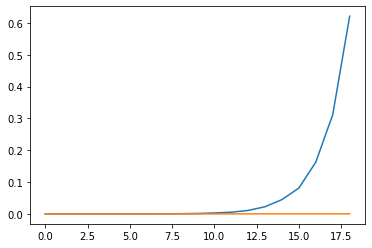

In [9]:
L = 50
run_and_plot(
    [tj_recursive, tj_dynamic_obf], 
    lambda n: (L, gen_text(n, L // 5)), 
    1, 20, 1
)

### Complexity

Let us rewrite the code in a more conventional way and plot its runtime to get  a sense of the complexity.

In [10]:
def tj_dynamic(L, W):
    n = len(W)
    tbl = [ math.inf ] * (n + 1)
    tbl[0] = 0
    for i in range(1, n + 1):
        for j in range(i):
            length = i - j - 1
            for k in range(j, i):
                length += len(W[k])
            if length > L:
                P = math.inf
            else:
                P = (L - length)**3
            tbl[i] = min(tbl[i], tbl[j] + P)
    return tbl[n]

In [11]:
tj_dynamic(L_example, W_example)

440

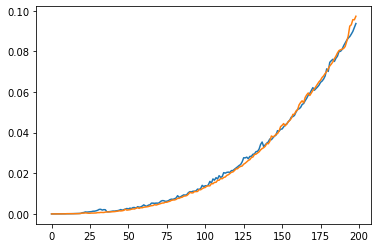

In [12]:
run_and_plot([tj_dynamic_obf, tj_dynamic], lambda n: (L, gen_text(n, L // 5)), 1, 200, 1)

### Speeding up

By computing the penalties more efficiently, we can reduce the complexity from $\mathrm{O}(n^3)$ to $\mathrm{O}(n^2)$.

In [13]:
def tj_dynamic_fast(L, W):
    n = len(W)
    tbl = [ math.inf ] * (n + 1)
    tbl[0] = 0
    for i in range(1, n + 1):
        length = -1
        for j in range(i - 1, -1, -1):
            length += 1 + len(W[j])
            if length > L:
                P = math.inf
            else:
                P = (L - length)**3
            tbl[i] = min(tbl[i], tbl[j] + P)
    return tbl[n]

In [14]:
tj_dynamic_fast(L_example, W_example)

440

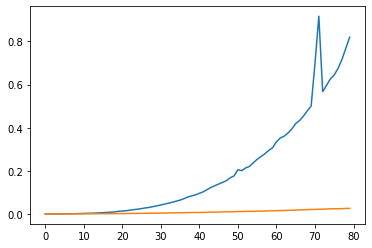

In [15]:
run_and_plot(
    [tj_dynamic, tj_dynamic_fast], 
    lambda n: (L, gen_text(n, L // 5)), 
    1, 400, 5)

### Constructing optimal split

**Idea** Memorize the j on which the maximum was acheved (will be stored in a separate `split` array).

In [16]:
def tj_dynamic(L, W):
    n = len(W)
    tbl = [ math.inf ] * (n + 1)
    split  = [0] * (n + 1) # NEW!
    tbl[0] = 0
    for i in range(1, n + 1):
        length = -1
        for j in range(i-1, -1, -1):
            length += 1 + len(W[j])
            if length > L:
                P = math.inf
            else:
                P = (L - length)**3
            if tbl[i] > tbl[j] + P:
                tbl[i] = tbl[j] + P
                split[i] = j
    print(tbl)
    print(split)
    return tbl[n]

In [17]:
tj_dynamic(L_example, W_example)

[0, 1331, 216, 1, 432, 440]
[0, 0, 0, 0, 2, 4]


440

In [18]:
def tj_full(L, W):
    n = len(W)
    tbl = [ math.inf ] * (n + 1)
    split  = [0] * (n + 1) # NEW!
    tbl[0] = 0
    for i in range(1, n + 1):
        length = -1
        for j in range(i-1, -1, -1):
            length += 1 + len(W[j])
            if length > L:
                P = math.inf
            else:
                P = (L - length)**3
            if tbl[i] > tbl[j] + P:
                tbl[i] = tbl[j] + P
                split[i] = j
    
    result = []
    last = n
    while last > 0:
        result.append(W[split[last] : last])
        last = split[last]
    return result[::-1]

In [19]:
tj_full(L_example, W_example)

[['jars', 'jaws'], ['joke', 'jury'], ['juxtaposition']]

In [20]:
text = gen_text(100, 7)
splitted = tj_full(50, text)
for line in splitted:
    print(" ".join(line))

AAAAAA AAA AAAAA AAA AAAAAA AAAA AAAAAA AA AAAAA
AA AAAA AAAAAA AA AAAAAA AAAAA AA AAAAAA AAA
AAAAAA AAAAA AAAA A AAA AAAAAAA AAAAAAA AAA
AAA A AAA A A AAAAAA AAAA AAAA AAA AAAA AAAAA
AAAAAA A AAAA AA AAAAAA AA AAA AA AAAAAAA AAA
A AAAAAAA AAA AAAA A A AAAAA A AAAAAAA AAAAAA
AA A A AAAAAA AAAAA AA A A AAAA A AAAAA AA
AAAAAA AAAAAA AAAAA AAAAA AAAAAA AAAAA AAAAA
AAA AA AAAAAAA AAA AAAAAA AAAAA AAAAAAA AAA
AAA AAA AAA AAAA AAAAAA AAAAAAA AAAAAAA AAAAAA
AAAAAAA AAAA AAAAA AA AAAAAAA AAAAA AA AAA
